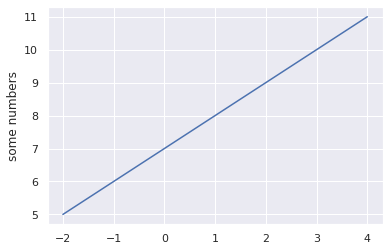

In [69]:
import matplotlib.pyplot as plt
plt.plot([-2,-1,0,1, 2, 3, 4],[5,6,7,8,9,10,11])
plt.ylabel('some numbers')
plt.show()

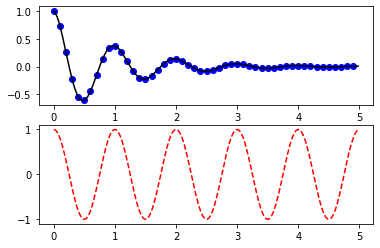

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

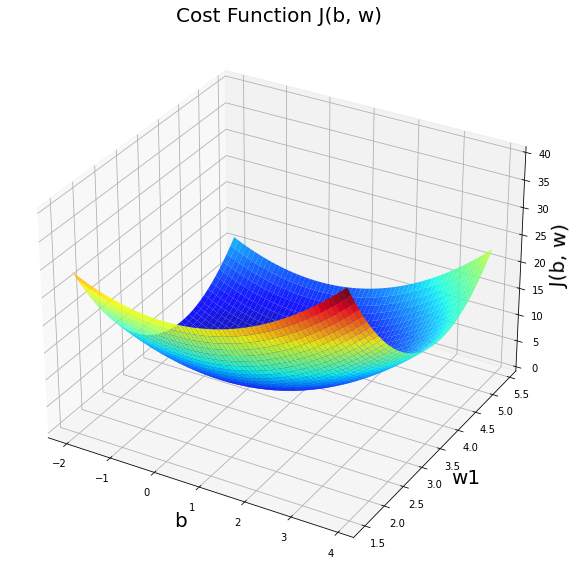

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# TODO: specify the matrix of quadratic coefficients, Q
Q = np.array([[2., 0.],
              [0., 8.]])

# TODO: specify the vector of linear coefficients, c
c = np.array([0, -32])

# TODO: specify the constant, c0
c0 = 64
def loss(x):
    # TODO: return loss given x
    return 0.5 * np.dot(x.T, np.dot(Q, x)) + np.dot(c, x) + c0
from mpl_toolkits.mplot3d.axes3d import Axes3D
# plotting
xgrid = np.mgrid[-2:4:0.1, 1.5:5.5:0.1]
xvec = xgrid.reshape(2, -1).T
F = np.vstack([loss(xi) for xi in xvec]).reshape(xgrid.shape[1:])

fig = plt.figure(figsize =(10, 10)) 

ax = plt.axes(projection='3d')
#ax.hold(True)
ax.plot_surface(xgrid[0], xgrid[1], F, rstride=1, cstride=1,
                cmap=plt.cm.jet, shade=True, alpha=0.9, linewidth=0)


xxgrid = np.mgrid[-2:4:0.1, 1.5:5.5:0.1]

ax = plt.axes(projection='3d')
#ax.hold(True)

ax.plot_surface(xxgrid[0], xxgrid[1], F, rstride=1, cstride=1,
                cmap=plt.cm.jet, shade=True, alpha=0.9, linewidth=0)
# ax.plot3D([x1], [x2], [f], 'og', mec='w', label='Constrained minimum')
# ax.legend(fancybox=True, numpoints=1)
ax.set_xlabel('b', fontsize=20)
ax.set_ylabel('w1', fontsize=20)
ax.set_zlabel('J(b, w)', fontsize=20)
ax.set_title('Cost Function J(b, w)', fontsize=20) 
ax.figure.savefig('/home/ronen/approximationSurface.jpg')




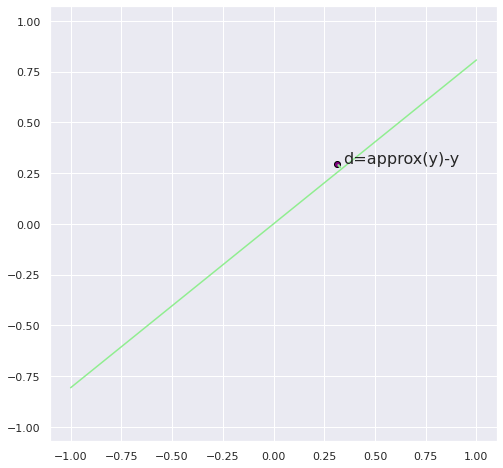

In [184]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))



prefs = {'color':'purple','edgecolors':'black'}
X = np.dot(np.random.rand(2,2), np.random.rand(2,1)).T

pts = np.linspace(-1,1)
v1_m = 0.8076549717643662

plt.scatter(X[:,0],X[:,1],**prefs)
plt.plot(pts, [v1_m*x for x in pts], color='lightgreen')

for x,y in X:
    # slope of connecting line
    # y = mx+b
    m = -np.reciprocal(v1_m)
    b = y-m*x
    plt.text(x*1.1, y, "d=approx(y)-y")


    # find intersecting point
    zx = b/(v1_m-m)
    zy = v1_m*zx

    # draw line
    plt.annotate('',(zx,zy),(x,y),arrowprops=dict(linewidth=2,arrowstyle='-',color='lightgreen'))

    plt.axis('equal')
plt.show()

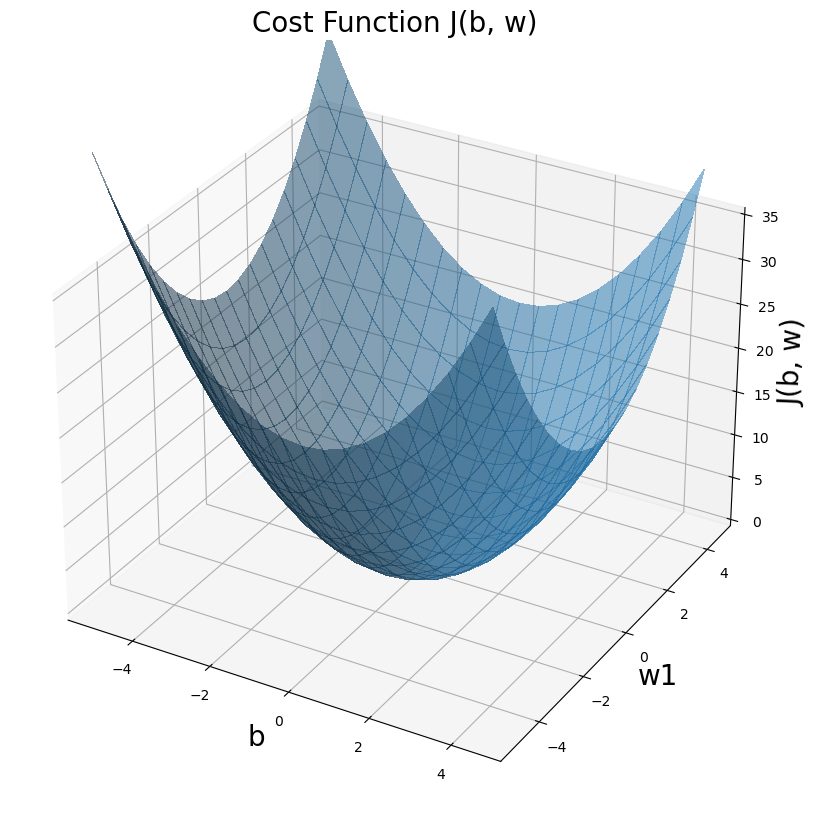

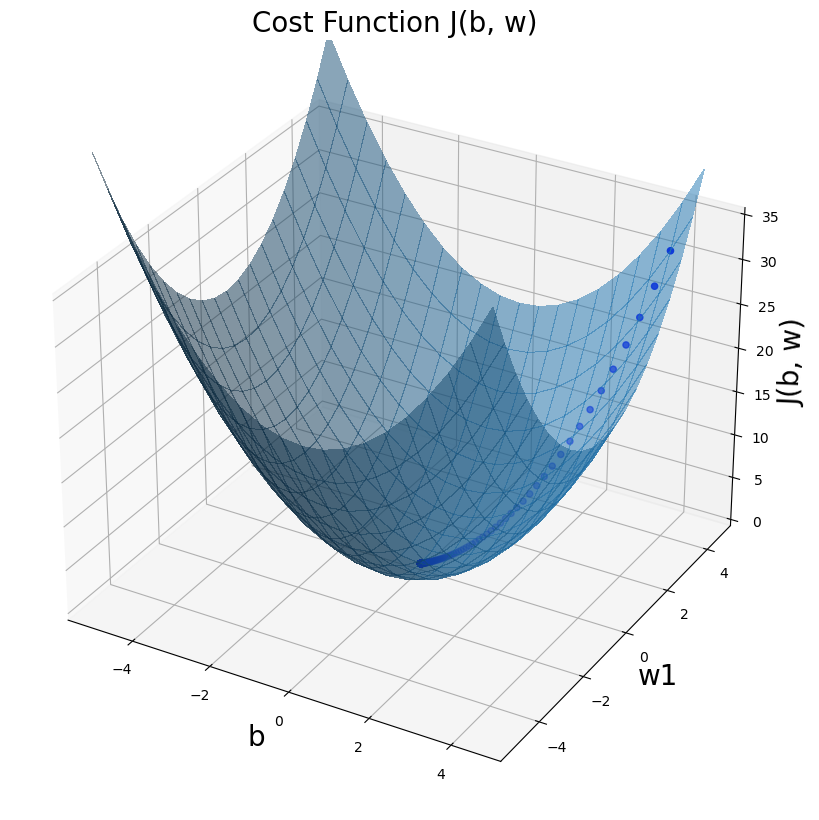

Making animation


In [1]:
# 2D Gradient Descent with animation saved file
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.animation as animation



def f(a,b):
    return a**2 + b**2

fig = plt.figure(figsize=(16, 6))
ax = fig.gca(projection='3d')
# plt.hold(True)
a = np.arange(-5, 5, 0.5)
b = np.arange(-5, 5, 0.5)
a, b = np.meshgrid(a, b)
c = f(a,b)

surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, alpha=0.5, 
                       linewidth=0, antialiased=False)
ax.set_zlim(-0.01, 35.01)

ax.set_xlabel('b', fontsize=20)
ax.set_ylabel('w1', fontsize=20)
ax.set_zlabel('J(b, w)', fontsize=20)
ax.set_title('Cost Function J(b, w)', fontsize=20) 

fig.set_figheight(10)
fig.set_figwidth(10)

fig.savefig('cost_function_2d.png')

def gradient_descent(theta0, iters, alpha):
    history = [theta0] # to store all thetas
    theta = theta0     # initial values for thetas
    # main loop by iterations:
    for i in range(iters):
        # gradient is [2x, 2y]:
        gradient = [2.0*x for x in theta] 
        # update parameters:
        theta = [a - alpha*b for a,b in zip(theta, gradient)]
        history.append(theta)
    return history

history = gradient_descent(theta0 = [4, 4], iters = 530, alpha = 0.03)

fig = plt.figure(figsize=(16, 6))

fig = plt.figure(2)
fig.set_figheight(10)
fig.set_figwidth(10)

ax = fig.gca(projection='3d')
# plt.hold(True)
a = np.arange(-5, 5, 0.5)
b = np.arange(-5, 5, 0.5)
a, b = np.meshgrid(a, b)
c = f(a,b)

surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, alpha=0.5, 
                       linewidth=0, antialiased=False)
ax.set_zlim(-0.01, 35.01)

a = np.array([x[0] for x in history])
b = np.array([x[1] for x in history])
c = f(a,b)
ax.scatter(a, b, c, color="b"); 
ax.set_xlabel('b', fontsize=20)
ax.set_ylabel('w1', fontsize=20)
ax.set_zlabel('J(b, w)', fontsize=20)
ax.set_title('Cost Function J(b, w)', fontsize=20) 
plt.show()

def rotate(angle):
    ax.view_init(azim=angle)

print("Making animation")
rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 8), interval=100)
# rot_animation.save('gradient_descent_2d.gif', dpi=80, writer='imagemagick')
plt.show()
rot_animation

[[ 0.11518937]
 [ 0.00276338]
 [-0.05511682]
 [-0.1763452 ]
 [ 0.04589411]
 [-0.16241279]
 [ 0.291773  ]
 [ 0.36366276]
 [-0.21655848]
 [ 0.19172504]
 [-0.07110508]]
[[1.36538272]
 [1.37312376]
 [1.37086064]
 [0.77168617]
 [1.37986689]
 [0.97119539]
 [1.86967195]
 [1.83886634]
 [1.04325754]
 [1.60701277]
 [1.28099418]]


TypeError: 'Axes3DSubplot' object is not subscriptable

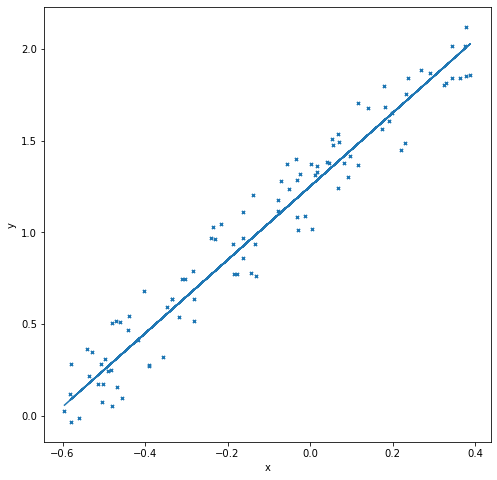

In [9]:
# imports
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.random.rand(100, 1)-0.6
y = 1 + 2 * x +0.5 * np.random.rand(100, 1)

print(x[1:12])

print(y[1:12])


# plot
plt.figure(figsize=(8,8))
plt.scatter(x,y,s=10, marker='x')

plt.xlabel('x')
plt.ylabel('y')

plt.plot(x, 1.25+2*x )
ax[1].scatter(theta1, J, c=colors, s=40, lw=0)
# ax[1].set_xlim(-0.2,1)
# ax[1].set_xlabel(r'$\theta_1$')
# ax[1].set_ylabel(r'$J(\theta_1)$')
# ax[1].set_title('Cost function')
# ax[0].set_xlabel(r'$x$')
# ax[0].set_ylabel(r'$y$')
# ax[0].set_title('Data and fit')
# ax[0].legend(loc='upper left', fontsize='small')

# plt.tight_layout()
# plt.show()
x_pos = 0.1
y_pos = 1.9
plt.rc('font', size=22)          # controls default text sizes
plt.text(-0.56, 2, "Line Approximation")
plt.rc('font', size=16)          # controls default text sizes

plt.text(x_pos, y_pos, "Y=b+w1*x")

plt.text(-0.05, 1.27, "b")


plt.savefig("/home/ronen/linearApproximation.jpg")

plt.axhline(y = 0, color ="green", linestyle ="--") 
  
plt.axvline(color ="green",linestyle ="--") 

idx = np.argwhere(np.diff(np.sign(f - g))).flatten()


plt.show()





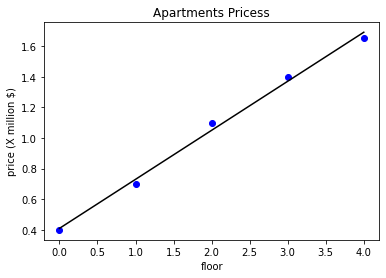

In [26]:
# Linear Fit 2D
import numpy as np
import matplotlib.pyplot as plt

x = [0, 1,2,3,4]
y = [0.4, 0.7,1.1,1.4,1.65] # 10, not 9, so the fit isn't perfect

coef = np.polyfit(x,y,1)

poly1d_fn = np.poly1d(coef) 


fig, ax = plt.subplots() # two axes on figure
ax.plot(x,y, 'bo', x, poly1d_fn(x), 'k')
ax.set_title('Apartments Pricess')

ax.set(xlabel='floor', ylabel='price (X million $)')


fig.savefig('linear_1d_prediction.png')

# x = np.linspace(0,5,20)
# y = 0.32*x+0.41
# plt.plot(x, y, '-r', label='y=2x+1')




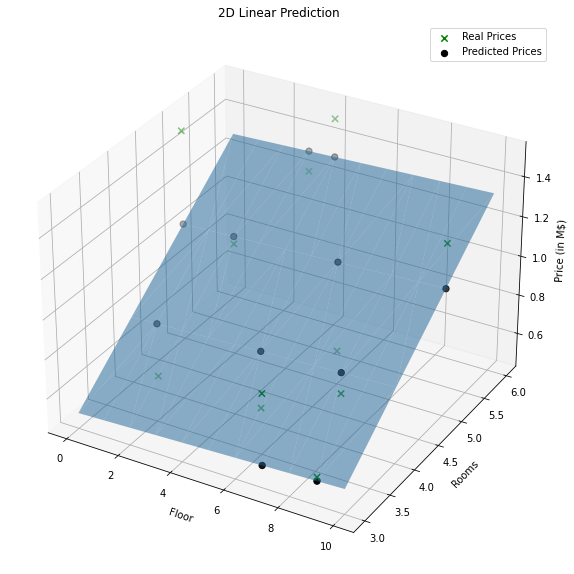

Making animation


In [2]:
# Linear Prediction Fit 3D with rotating gif production

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.animation as animation



# 3D


x1=[0, 1,2,3,4]
x2= [5, 4,5,6,6]
ones=[1,1,1,1,1]
Y = [1.5, 0.5,1,1.2,1.5] # 10, not 9, so the fit isn't perfect

x1=[0, 1,2,3,4,5,6,7,8,9,10]
x2=[5, 4,5,6,6,4,5,3,4,3,5]
ones=[1,1,1,1,1,1,1,1,1,1,1]
Y=[1.5, 0.5,1,1.2,1.5,0.5, 0.6, 0.9, 0.7, 0.57, 1.3] # 10, not 9, so the fit isn't perfect



X = list(zip((x1), (x2),(ones)))

    
# use numpy arrays so that we can use linear algebra later
X = np.array(X)
Y = np.array(Y)

# graph the data
# fig = plt.figure()
    
    
a = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
predictedY = np.dot(X, a)


# create a wiremesh for the plane that the predicted values will lie
xx, yy, zz = np.meshgrid(X[:, 0], X[:, 1], X[:, 2])
combinedArrays = np.vstack((xx.flatten(), yy.flatten(), zz.flatten())).T
Z = combinedArrays.dot(a)

# graph the original data, predicted data, and wiremesh plane
fig = plt.figure(2)
fig.set_figheight(10)
fig.set_figwidth(10)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, color='green', marker='x', s=40, label='Real Prices')
ax.scatter(X[:, 0], X[:, 1], predictedY, color='black', s=40,  marker='o', label='Predicted Prices')
ax.plot_trisurf(combinedArrays[:, 0], combinedArrays[:, 1], Z, linewidth=0.2, antialiased=True, alpha=0.5)

    
ax.set_xlabel('Floor')
ax.set_ylabel('Rooms')
ax.set_zlabel('Price (in M$)')
ax.legend()
ax.set_title('2D Linear Prediction')

plt.show()

def rotate(angle):
    ax.view_init(azim=angle)

print("Making animation")
rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
rot_animation.save('linear_prediction_2d.gif', dpi=80, writer='imagemagick')

# Clustering


# LINE ESTIMATOR DISTANCE

[[0.85132344 0.2355672 ]
 [0.75818347 0.63382511]]
[[0.95512603]
 [0.26024658]]
[[0.32212521 0.69595145]]


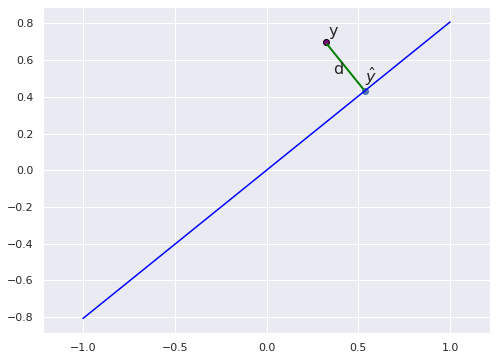

In [336]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))

prefs = {'color':'purple','edgecolors':'black'}
print(np.random.rand(2,2))
print(np.random.rand(2,1))
X = np.dot(np.random.rand(2,2), np.random.rand(2,1)).T
print(X)
pts = np.linspace(-1,1)
v1_m = 0.8076549717643662

plt.scatter(X[:,0],X[:,1],**prefs)
plt.plot(pts, [v1_m*x for x in pts], color='blue')

for x,y in X:
    # slope of connecting line
    # y = mx+b
    m = -np.reciprocal(v1_m)
    b = y-m*x
    

    # find intersecting point
    zx = b/(v1_m-m)
    zy = v1_m*zx
    plt.text(zx, 1.1*zy, "$\^y$")
    plt.scatter(zx, zy)



    # draw line
    plt.annotate('',(zx,zy),(x,y),arrowprops=dict(linewidth=2,arrowstyle='-',color='green'))
    plt.text(1.05*x, 1.05*y, "y")
    plt.text(1.13*x, 0.75*y, "d")


plt.axis('equal')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm



/home/ronen/mine/my_conda_env/env/lib/python3.8/site-packages/numpy/ma/core.py:2831: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  _data = np.array(data, dtype=dtype, copy=copy,


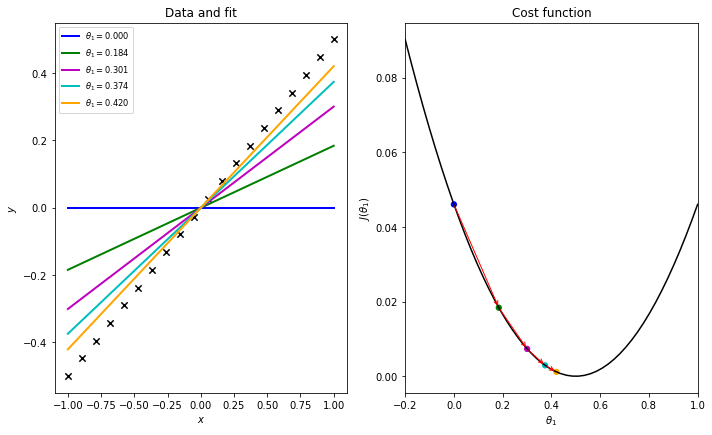

In [110]:
# First construct a grid of theta1 parameter pairs and their corresponding
# cost function values.
theta1_grid = np.linspace(-0.2,1,50)
J_grid = cost_func(theta1_grid[:,np.newaxis])

# The cost function as a function of its single parameter, theta1.
ax[1].plot(theta1_grid, J_grid, 'k')

# Take N steps with learning rate alpha down the steepest gradient,
# starting at theta1 = 0.
N = 5
alpha = 1
theta1 = [0]
J = [cost_func(theta1[0])[0]]
for j in range(N-1):
    last_theta1 = theta1[-1]
    this_theta1 = last_theta1 - alpha / m * np.sum(
                                    (hypothesis(x, last_theta1) - y) * x)
    theta1.append(this_theta1)
    J.append(cost_func(this_theta1))

# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, theta1[0]), color=colors[0], lw=2,
           label=r'$\theta_1 = {:.3f}$'.format(theta1[0]))
for j in range(1,N):
    ax[1].annotate('', xy=(theta1[j], J[j]), xytext=(theta1[j-1], J[j-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, hypothesis(x, theta1[j]), color=colors[j], lw=2,
               label=r'$\theta_1 = {:.3f}$'.format(theta1[j]))

# Labels, titles and a legend.
ax[1].scatter(theta1, J, c=colors, s=40, lw=0)
ax[1].set_xlim(-0.2,1)
ax[1].set_xlabel(r'$\theta_1$')
ax[1].set_ylabel(r'$J(\theta_1)$')
ax[1].set_title('Cost function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
ax[0].legend(loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()

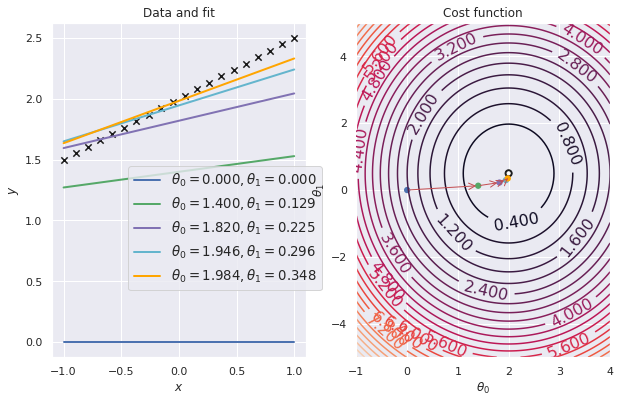

In [340]:
import numpy as np
import matplotlib.pyplot as plt

# The data to fit
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[np.newaxis,:,np.newaxis],
                   theta1_grid[:,np.newaxis,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax[1].contour(X, Y, J_grid, 30)
ax[1].clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax[1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 5
alpha = 0.7
theta = [np.array((0,0))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))


# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, *theta[0]), color=colors[0], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
for j in range(1,N):
    ax[1].annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, hypothesis(x, *theta[j]), color=colors[j], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[j]))
ax[1].scatter(*zip(*theta), c=colors, s=40, lw=0)

# Labels, titles and a legend.
ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')
ax[1].set_title('Cost function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
axbox = ax[0].get_position()
# Position the legend by hand so that it doesn't cover up any of the lines.
ax[0].legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.1*axbox.height),
             fontsize='small')

plt.show()

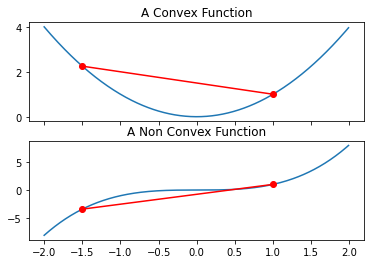

In [88]:
# Show convex function

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def f2(x):
    return x**2


def f3(x):
    return x**3

fig, axs = plt.subplots(2)

x = np.arange(-2, 2, 0.01)

axs[0].plot(x, f2(x))
axs[1].plot(x, f3(x))

x1=-1.5
x2=1
axs[0].plot([x1,x2], [f2(x1), f2(x2)], 'ro-')
axs[1].plot([x1,x2], [f3(x1), f3(x2)], 'ro-')

axs[0].set_title('A Convex Function')
axs[1].set_title('A Non Convex Function')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('convex_non_convex.png')




In [ ]:
# Gradient Decent

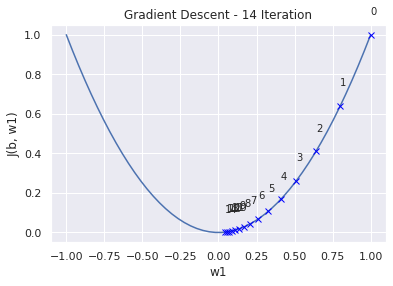

In [437]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def f(x):
    return x**2

def grad(x):
    return 2*x

def gd(x, grad, alpha, max_iter=14):
    xs = np.zeros(1 + max_iter)
    xs[0] = x
    for i in range(max_iter):
        x = x - alpha * grad(x)
        xs[i+1] = x
    return xs


alpha = 0.1
x0 = 1
xs = gd(x0, grad, alpha)
xp = np.linspace(-1, 1, 50)
plt.plot(xp, f(xp))
plt.plot(xs, f(xs), 'x', c='blue')
plt.title('Gradient Descent - 14 Iteration')
plt.ylabel('J(b, w1)')
plt.xlabel('w1')


for i, (x, y) in enumerate(zip(xs, f(xs)), 1):
    plt.text(x, y+0.1, i-1)

pass



In [ ]:
# Gradinet Descent Oscilations

Text(0.5, 0, 'w1')

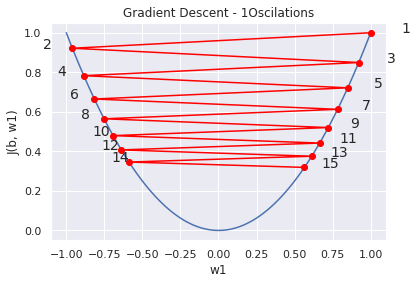

In [448]:

alpha = 0.98
xs = gd(1, grad, alpha)
xp = np.linspace(-1., 1., 100)
plt.plot(xp, f(xp))
plt.plot(xs, f(xs), 'o-', c='red')
for i, (x, y) in enumerate(zip(xs, f(xs)), 1):
    plt.text(x*1.2, y, i, fontsize=14)
pass
plt.title('Gradient Descent - 1Oscilations')
plt.ylabel('J(b, w1)')
plt.xlabel('w1')

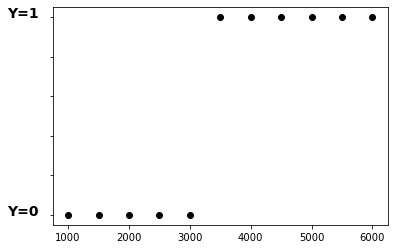

In [4]:
import matplotlib.pyplot as plt

# Binary pointss
fig,ax = plt.subplots(1)



ax.plot([1000,1500, 2000,2500,3000,3500, 4000,4500, 5000,5500, 6000],[0,0.0,0.,0,0 , 1, 1, 1.,1,1,1], 'o', color='black')
ax.text(0, 0, "Y=0",fontsize=14,weight="bold")
ax.text(0, 1, "Y=1",fontsize=14,weight="bold")

# Turn off tick labels
ax.set_yticklabels([])
fig.savefig('binary_point.png')



plt.show()

[Text(0, -0.4, ''),
 Text(0, -0.2, ''),
 Text(0, 0.0, ''),
 Text(0, 0.20000000000000007, ''),
 Text(0, 0.4, ''),
 Text(0, 0.6, ''),
 Text(0, 0.8000000000000002, ''),
 Text(0, 1.0, ''),
 Text(0, 1.2000000000000002, ''),
 Text(0, 1.4, '')]

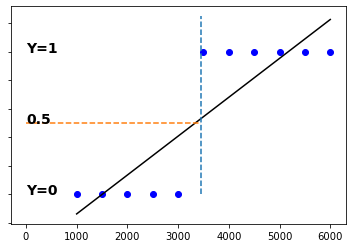

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# binary points linear regression:
x=[1000,1500, 2000,2500,3000,3500, 4000,4500, 5000,5500, 6000]
y=[0,0.0,0.,0,0 , 1, 1, 1.,1,1,1]

coef = np.polyfit(x,y,1)

poly1d_fn = np.poly1d(coef) 


fig, ax = plt.subplots() # two axes on figure
ax.plot(x,y, 'bo', x, poly1d_fn(x), 'k')
ax.text(0, 0, "Y=0",fontsize=14,weight="bold")
ax.text(0, 1, "Y=1",fontsize=14,weight="bold")
ax.text(0, 0.5, "0.5",fontsize=14,weight="bold")
fig.savefig('binary_point_linear_pred_with_markers.png')

fig.savefig('binary_point_linear_pred.png')

ax.plot([3450,3450],[0, 1.25] ,'--')
ax.plot([0,3450],[0.5, 0.5] ,'--')
fig.savefig('binary_point_linear_pred_with_markers.png')
ax.set_yticklabels([])





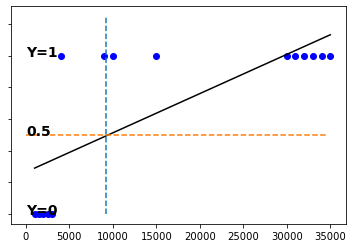

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# binary points linear regression:


x=[1000,1500, 2000,2500,3000, 4000, 9000, 10000, 15000, 30000, 31000, 32000, 33000, 34000, 35000]
y=[0,0,0,0,0 , 1,1, 1, 1, 1.,1,1, 1,1, 1]

coef = np.polyfit(x,y,1)

poly1d_fn = np.poly1d(coef) 

fig, ax = plt.subplots() # two axes on figure

ax.plot(x,y, 'bo', x, poly1d_fn(x), 'k')
ax.text(0, 0, "Y=0",fontsize=14,weight="bold")
ax.text(0, 1, "Y=1",fontsize=14,weight="bold")
ax.text(0, 0.5, "0.5",fontsize=14,weight="bold")
ax.plot([9200,9200],[0, 1.25] ,'--')
ax.plot([0,34500],[0.5, 0.5] ,'--')
ax.set_yticklabels([])
fig.savefig('binary_point_linear_pred_problem.png')


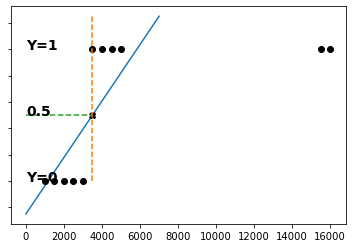

In [17]:
import matplotlib.pyplot as plt

# Create Figure and Axes instances
fig,ax = plt.subplots(1)


ax.plot([0,7000],[-0.25, 1.25])

ax.plot([1000,1500, 2000,2500,3000,3500, 4000,4500, 5000,15500, 16000],[0,0.0,0.,0,0 , 1, 1, 1.,1,1,1], 'o', color='black')
ax.text(0, 0, "Y=0",fontsize=14,weight="bold")
ax.text(0, 1, "Y=1",fontsize=14,weight="bold")
ax.text(0, 0.5, "0.5",fontsize=14,weight="bold")
ax.plot([3450],[0.5], 'X', color='black')

ax.plot([3450,3450],[0, 1.25] ,'--')
ax.plot([0,3450],[0.5, 0.5] ,'--')

# Turn off tick labels
ax.set_yticklabels([])


plt.show()

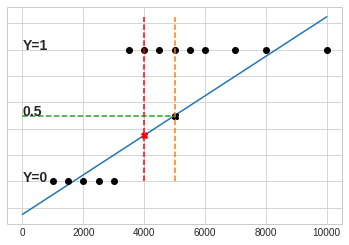

In [105]:
import matplotlib.pyplot as plt

# Create Figure and Axes instances
fig,ax = plt.subplots(1)




ax.plot([0,10000],[-0.25, 1.25])

ax.plot([1000,1500, 2000,2500,3000,3500, 4000,4500, 5000,5500, 6000,7000,8000, 10000],[0,0.0,0.,0,0 , 1,1, 1, 1.,1,1,1,1,1], 'o', color='black')
ax.text(0, 0, "Y=0",fontsize=14,weight="bold")
ax.text(0, 1, "Y=1",fontsize=14,weight="bold")
ax.text(0, 0.5, "0.5",fontsize=14,weight="bold")
ax.plot([5000],[0.5], 'X', color='black')
ax.plot([5000],[0.5], 'X', color='black')
ax.plot([4000],[0.35], 'X', color='red')


ax.plot([5000,5000],[0, 1.25] ,'--')
ax.plot([4000,4000],[0, 1.25] ,'--', color='RED')

ax.plot([0,5000],[0.5, 0.5] ,'--')

# Turn off tick labels
ax.set_yticklabels([])







plt.show()



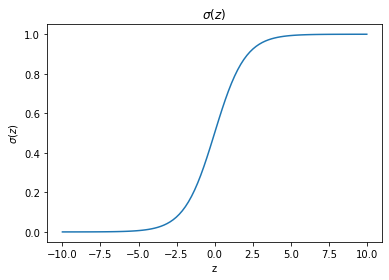

Text(0.5, 1.0, '$1-\\sigma(z)$')

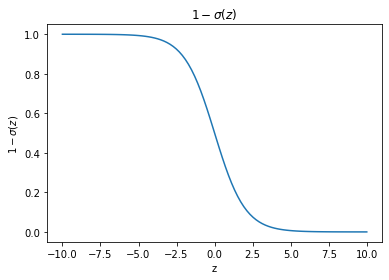

In [1]:
# Import matplotlib, numpy and math 
import matplotlib.pyplot as plt 
import numpy as np 
import math 
  
x = np.linspace(-10, 10, 100) 
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, z) 
plt.xlabel("z") 
plt.ylabel(r'$\sigma(z)$') 
plt.title(r'$\sigma(z)$')
 
plt.show() 

z = 1-1/(1 + np.exp(-x)) 
plt.plot(x, z) 
plt.xlabel("z") 
plt.ylabel(r'$1-\sigma(z)$') 
plt.title(r'$1-\sigma(z)$')




Text(-0.56, 2, 'Line Approximation')

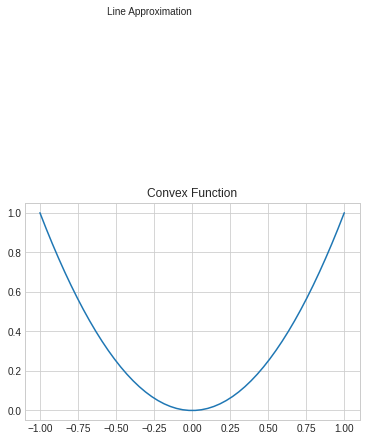

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def f(x):
    return x**2



alpha = 0.1

xp = np.linspace(-1, 1, 50)
plt.plot(xp, f(xp))
plt.title('Convex Function')





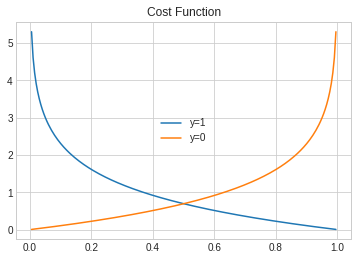

In [131]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def f(x):
    return np.log(x)





x = np.arange(0.005, 1.0, 0.005)
y=-f(x)
plt.plot(x, y, label="y=1")
plt.title('Cost Function')
y=-f(1-x)
plt.plot(x,y, label="y=0")
plt.legend(loc='center')

